In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [73]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(download_if_missing= True)
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [74]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [75]:
df=pd.DataFrame(data.data, columns= data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [76]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

<AxesSubplot:xlabel='HouseAge', ylabel='Count'>

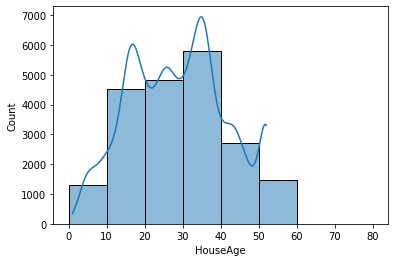

In [77]:
sns.histplot(df.HouseAge, kde= True, bins=np.arange(0,89,10))

In [78]:
bins=np.arange(0,60,5)
bins

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

In [79]:
df['HouseAge']=pd.cut(df.HouseAge,bins=bins)

In [80]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,"(40, 45]",6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,"(20, 25]",6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,"(50, 55]",8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,"(50, 55]",5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,"(50, 55]",6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,"(20, 25]",5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,"(15, 20]",6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,"(15, 20]",5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,"(15, 20]",5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [81]:
df=pd.get_dummies(df,columns=['HouseAge'])


In [82]:
from sklearn.model_selection import train_test_split

In [44]:
y=data.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [83]:
xtrain, xtest, ytrain, ytest= train_test_split(df, y,test_size=0.3, random_state=32)

In [84]:
xtrain

,MedInc,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,"HouseAge_(0, 5]","HouseAge_(5, 10]","HouseAge_(10, 15]","HouseAge_(15, 20]","HouseAge_(20, 25]","HouseAge_(25, 30]","HouseAge_(30, 35]","HouseAge_(35, 40]","HouseAge_(40, 45]","HouseAge_(45, 50]","HouseAge_(50, 55]"
6363,3.6806,4.709821,1.026786,1890.0,4.218750,34.13,-117.98,0,0,0,0,0,1,0,0,0,0,0
10305,6.6678,7.692308,1.017094,871.0,3.722222,33.88,-117.78,0,0,0,1,0,0,0,0,0,0,0
15724,2.8654,5.342466,1.203957,1703.0,2.592085,37.78,-122.44,0,0,0,0,0,0,0,0,0,0,1
17592,4.4375,5.710345,1.041379,446.0,3.075862,37.30,-121.91,0,0,0,0,0,0,0,0,1,0,0
1234,4.4063,28.757282,5.300971,252.0,2.446602,38.26,-120.33,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19527,2.7917,4.732258,1.058065,673.0,2.170968,37.64,-120.96,0,0,0,0,0,0,0,0,1,0,0
20414,3.5504,4.302564,1.065934,3089.0,2.263004,34.18,-118.85,0,0,1,0,0,0,0,0,0,0,0
9526,1.7813,4.356436,1.000000,1048.0,3.458746,39.13,-123.16,0,0,0,0,0,0,1,0,0,0,0
9771,3.3289,5.580488,1.290244,1449.0,3.534146,36.38,-121.40,0,0,0,0,0,0,0,1,0,0,0


In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler=MinMaxScaler()
scaler.fit(xtrain)

MinMaxScaler()

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
xtrain=scaler.transform(xtrain)
xtrain

array([[0.2193556 , 0.02452183, 0.02055689, ..., 0.        , 0.        ,
        0.        ],
       [0.42536655, 0.04572712, 0.02026959, ..., 0.        , 0.        ,
        0.        ],
       [0.16313568, 0.02901989, 0.02580901, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.08837119, 0.02200928, 0.01976285, ..., 0.        , 0.        ,
        0.        ],
       [0.19510076, 0.03071221, 0.02836691, ..., 0.        , 0.        ,
        0.        ],
       [0.29655453, 0.02817676, 0.0210902 , ..., 0.        , 0.        ,
        0.        ]])

In [89]:
scaler.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
        'Latitude', 'Longitude', 'HouseAge_(0, 5]', 'HouseAge_(5, 10]',
        'HouseAge_(10, 15]', 'HouseAge_(15, 20]', 'HouseAge_(20, 25]',
        'HouseAge_(25, 30]', 'HouseAge_(30, 35]', 'HouseAge_(35, 40]',
        'HouseAge_(40, 45]', 'HouseAge_(45, 50]', 'HouseAge_(50, 55]'],
       dtype=object),
 'n_features_in_': 18,
 'n_samples_seen_': 14448,
 'scale_': array([6.89645660e-02, 7.10993705e-03, 2.96442688e-02, 3.50127797e-05,
        1.99405393e-03, 1.06269926e-01, 9.96015936e-02, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00]),
 'min_': array([-3.44753865e-02, -8.96470324e-03, -9.88142292e-03, -1.75063898e-04,
        -1.93540528e-03, -3.45802338e+00,  1.23854582e+01,  0.00000000e

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
model=LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [92]:
list(zip(xtest.columns, model.coef_))

[('MedInc', 6.268673778089339),
 ('AveRooms', -14.070003409842018),
 ('AveBedrms', 19.409760042852845),
 ('Population', -0.17043052610450732),
 ('AveOccup', -4.037945003734856),
 ('Latitude', -4.0542023669150735),
 ('Longitude', -4.3816817052886865),
 ('HouseAge_(0, 5]', -7442813894085.207),
 ('HouseAge_(5, 10]', -7442813894085.172),
 ('HouseAge_(10, 15]', -7442813894085.112),
 ('HouseAge_(15, 20]', -7442813894085.064),
 ('HouseAge_(20, 25]', -7442813894084.993),
 ('HouseAge_(25, 30]', -7442813894085.004),
 ('HouseAge_(30, 35]', -7442813894085.023),
 ('HouseAge_(35, 40]', -7442813894085.018),
 ('HouseAge_(40, 45]', -7442813894084.9375),
 ('HouseAge_(45, 50]', -7442813894084.936),
 ('HouseAge_(50, 55]', -7442813894084.505)]

In [93]:
yhat=model.predict(scaler.transform(xtest))
yhat

array([0.66992188, 1.71875   , 2.60546875, ..., 1.45605469, 1.75097656,
       1.60253906])

In [94]:
list(zip(yhat, ytest))

[(0.669921875, 0.523),
 (1.71875, 0.875),
 (2.60546875, 2.538),
 (4.5556640625, 5.00001),
 (0.982421875, 0.981),
 (1.41796875, 1.313),
 (1.869140625, 1.345),
 (1.833984375, 1.724),
 (1.39453125, 0.699),
 (1.8681640625, 2.276),
 (1.515625, 1.265),
 (1.720703125, 1.587),
 (3.0087890625, 2.621),
 (2.8828125, 2.41),
 (2.1298828125, 4.098),
 (1.0615234375, 1.049),
 (1.48828125, 1.894),
 (2.689453125, 2.414),
 (1.75, 2.256),
 (2.978515625, 3.177),
 (3.87109375, 4.734),
 (2.384765625, 1.8),
 (1.466796875, 2.625),
 (2.8564453125, 3.31),
 (2.611328125, 2.4),
 (3.3701171875, 3.279),
 (1.5029296875, 0.912),
 (4.017578125, 3.973),
 (2.3076171875, 2.625),
 (2.1083984375, 2.812),
 (1.6181640625, 1.219),
 (0.3916015625, 0.949),
 (1.318359375, 0.821),
 (1.421875, 1.137),
 (1.732421875, 1.31),
 (1.9091796875, 2.232),
 (0.677734375, 0.588),
 (1.880859375, 1.445),
 (1.6259765625, 0.816),
 (0.5966796875, 0.641),
 (2.9169921875, 3.694),
 (1.5048828125, 1.792),
 (3.3125, 2.231),
 (1.322265625, 0.65),
 (1.96

In [95]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [96]:
r2_score(ytest, yhat)

0.6008321402716792

In [97]:
mean_squared_error(ytest, yhat)

0.5325285172110197

In [98]:
mean_absolute_error(ytest, yhat)

0.5262228470708172

<Figure size 504x504 with 0 Axes>

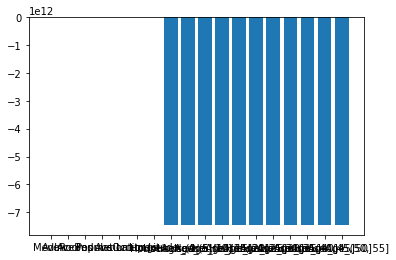

<Figure size 504x504 with 0 Axes>

In [99]:
plt.bar(xtest.columns,model.coef_)
plt.figure(figsize=(7,7))